# PROJET FINAL: Analyse de données et machine learning avec Python

Il s'agit d'analyser les données collectées sur la pandémie du covid 19 qui sont dans un fichier au format csv (voir dossier *data*).

## Description du jeu du données:

### Contexte

La maladie à coronavirus (COVID-19) est une maladie infectieuse causée par un coronavirus récemment découvert. La plupart des personnes infectées par le virus COVID-19 souffriront d'une maladie respiratoire légère à modérée et se rétabliront sans nécessiter de traitement particulier. Les personnes âgées et celles qui présentent des problèmes médicaux sous-jacents tels que les maladies cardiovasculaires, le diabète, les maladies respiratoires chroniques et le cancer sont plus susceptibles de développer une maladie grave.

Pendant toute la durée de la pandémie, l'un des principaux problèmes auxquels les prestataires de soins de santé ont été confrontés est le manque de ressources médicales et d'un plan approprié pour les distribuer efficacement. En ces temps difficiles, être capable de prédire le type de ressources dont un individu pourrait avoir besoin au moment où il est testé positif ou même avant cela sera d'une aide immense pour les autorités car elles seront en mesure de se procurer et d'organiser les ressources nécessaires pour sauver la vie de ce patient.

L'objectif principal de ce projet est de construire un modèle d'apprentissage automatique qui, compte tenu des symptômes, de l'état et des antécédents médicaux d'un patient atteint du Covid-19, permettra de prédire si le patient est à haut risque ou non.

### Description du jeux de données

Le jeu de données a été fourni par le gouvernement mexicain. Cet ensemble de données contient un nombre énorme d'informations anonymes relatives aux patients, y compris les conditions préalables. L'ensemble de données brutes se compose de 21 caractéristiques uniques et de 1 048 576 patients uniques. Dans les caractéristiques booléennes, 1 signifie "oui" et 2 signifie "non". Les valeurs 97 et 99 indique des données manquantes.

Quelques informations sur les *features*:

- sex : femme ou homme
- age : du patient.
- classification : résultats du test covid. Les valeurs 1-3 signifient que le patient a été diagnostiqué avec un covid à différents degrés. 4 ou plus signifie que le patient n'est pas porteur du covid ou que le test n'est pas concluant.
- patient type: hospitalisé ou non hospitalisé.
- pneumonia : si le patient a déjà une inflammation lié à la pneumonie ou non.
- pregnancy : si la patiente est enceinte ou non.
- diabetes : indique si le patient est diabétique ou non.
- copd: indique si le patient est atteint ou non de bronchopneumopathie chronique obstructive.
- asthma : indique si le patient est asthmatique ou non.
- inmsupr : indique si le patient est immunodéprimé ou non.
- hypertension : si le patient est hypertendu ou non.
- cardiovascular : si le patient est atteint d'une maladie du cœur ou des vaisseaux sanguins.
- renal chronic : si le patient est atteint d'une maladie rénale chronique ou non.
- other disease : si le patient est atteint d'une autre maladie ou non.
- obesity : si le patient est obèse ou non.
- tobacco : si le patient est un fumeur.
- usmr : indique si le patient a traité des unités médicales de premier, deuxième ou troisième niveau.
- medical unit: type d'institution du système national de santé qui a dispensé les soins.
- intubed : indique si le patient a été relié au ventilateur.
- icu : indique si le patient a été admis dans une unité de soins intensifs.


## Étape 1 : Préparation et nettoyage des données
1. Chargez le jeu de données  dans un *dataframe* à l'aide de Pandas.
2. Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc.
3. Traitez les données manquantes, incorrectes et invalides, doublons, etc.
4. Effectuez toute étape supplémentaire (analyse des dates, création de colonnes supplémentaires, fusion de plusieurs ensembles de données, etc.)

In [21]:
# ETAPE 1 : Preparation et nettoyage des donnees

# QUESTION 1 : Charger les donnees
print("--------debut question 1--------")
import pandas as pd
import numpy as np

# Charger le fichier CSV
chemin = 'data/covid19_data.csv'
df = pd.read_csv(chemin)
print("Fichier charge avec succes !")
print("---------fin question 1----------")

# QUESTION 2 : Explorer les donnees
print("--------debut question 2--------")

# Afficher le nombre de lignes et colonnes
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

# Afficher les statistiques
print("\nStatistiques descriptives :")
print(df.describe())
print("---------fin question 2----------")

# QUESTION 3 : Traiter les donnees manquantes
print("--------debut question 3--------")

# Les valeurs 97, 98, 99 signifient "donnee manquante"
# On les remplace par NaN (Not a Number)
colonnes = df.columns.drop('AGE')
df[colonnes] = df[colonnes].replace([97, 98, 99], np.nan)
# Compter les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Supprimer les colonnes avec trop de valeurs manquantes
df = df.drop(columns=['ICU', 'INTUBED'])

# Supprimer les lignes avec des valeurs manquantes
lignes_avant = len(df)
df = df.dropna()
lignes_apres = len(df)

print("\nAvant nettoyage :", lignes_avant, "lignes")
print("Apres nettoyage :", lignes_apres, "lignes")
print("Lignes supprimees :", lignes_avant - lignes_apres)
print("---------fin question 3----------")

# QUESTION 4 : Creer la variable cible
print("--------debut question 4--------")

# Un patient est a haut risque s'il a une pneumonie ET s'il est hospitalise
df['high_risk'] = ((df['PNEUMONIA'] == 1) & (df['PATIENT_TYPE'] == 1)).astype(int)

# Afficher la repartition
print("\nRepartition de la variable high_risk :")
print(df['high_risk'].value_counts())

# Afficher les pourcentages
print("\nPourcentages :")
print(df['high_risk'].value_counts(normalize=True) * 100)

# Apercu des donnees
print("\nApercu des 5 premieres lignes :")
print(df.head())

# Separer les donnees : X = variables explicatives, y = variable a predire
y = df['high_risk']
X = df.drop(columns=['high_risk'])

print("\nDimensions de X :", X.shape)
print("Dimensions de y :", y.shape)
# -----------------------------------------------------
# 4.4 Sauvegarde du jeu de données final
# -----------------------------------------------------
df.to_csv("covid19_final_ready.csv", index=False)
print("\n Étape 1 terminée : dataset prêt pour le Machine Learning")
print("---------fin question 4----------")

--------debut question 1--------
Fichier charge avec succes !
---------fin question 1----------
--------debut question 2--------
Nombre de lignes : 1048575
Nombre de colonnes : 21

Statistiques descriptives :
              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  7.952288e+01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  3.686889e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  9.700000e+01   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  9.700000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  9.700000e+01   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  9.900000e+01   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \


## Etape 2:  Effectuer une analyse exploratoire et une visualisation
1. Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.
2. Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.
3. Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les *features* (voir visualisation avec heatmap)
4. Notez les résultats intéressants de l'analyse exploratoire.


Les donnees sont deja chargees.
--------debut question 1--------
Statistiques descriptives globales :
               USMER   MEDICAL_UNIT       SEX   PATIENT_TYPE      PNEUMONIA  \
count  510041.000000  510041.000000  510041.0  510041.000000  510041.000000   
mean        1.643393       8.979327       1.0       1.152543       1.892830   
std         0.478998       3.745231       0.0       0.359546       0.309329   
min         1.000000       1.000000       1.0       1.000000       1.000000   
25%         1.000000       4.000000       1.0       1.000000       2.000000   
50%         2.000000      12.000000       1.0       1.000000       2.000000   
75%         2.000000      12.000000       1.0       1.000000       2.000000   
max         2.000000      13.000000       1.0       2.000000       2.000000   

                 AGE       PREGNANT       DIABETES           COPD  \
count  510041.000000  510041.000000  510041.000000  510041.000000   
mean       41.407089       1.984627       1.8839

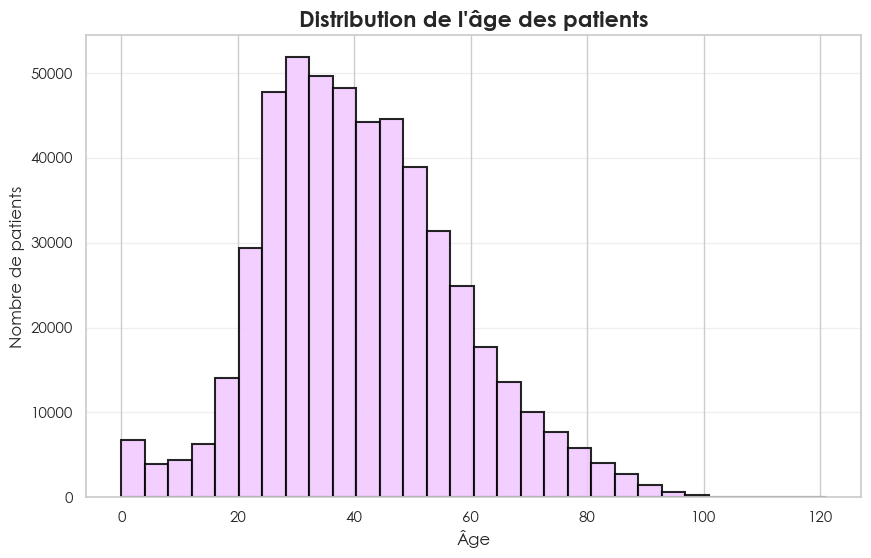

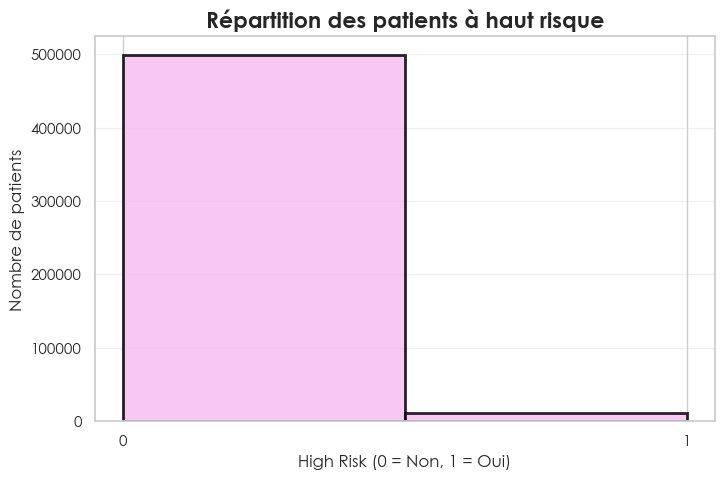

---------fin question 2----------
--------debut question 3--------


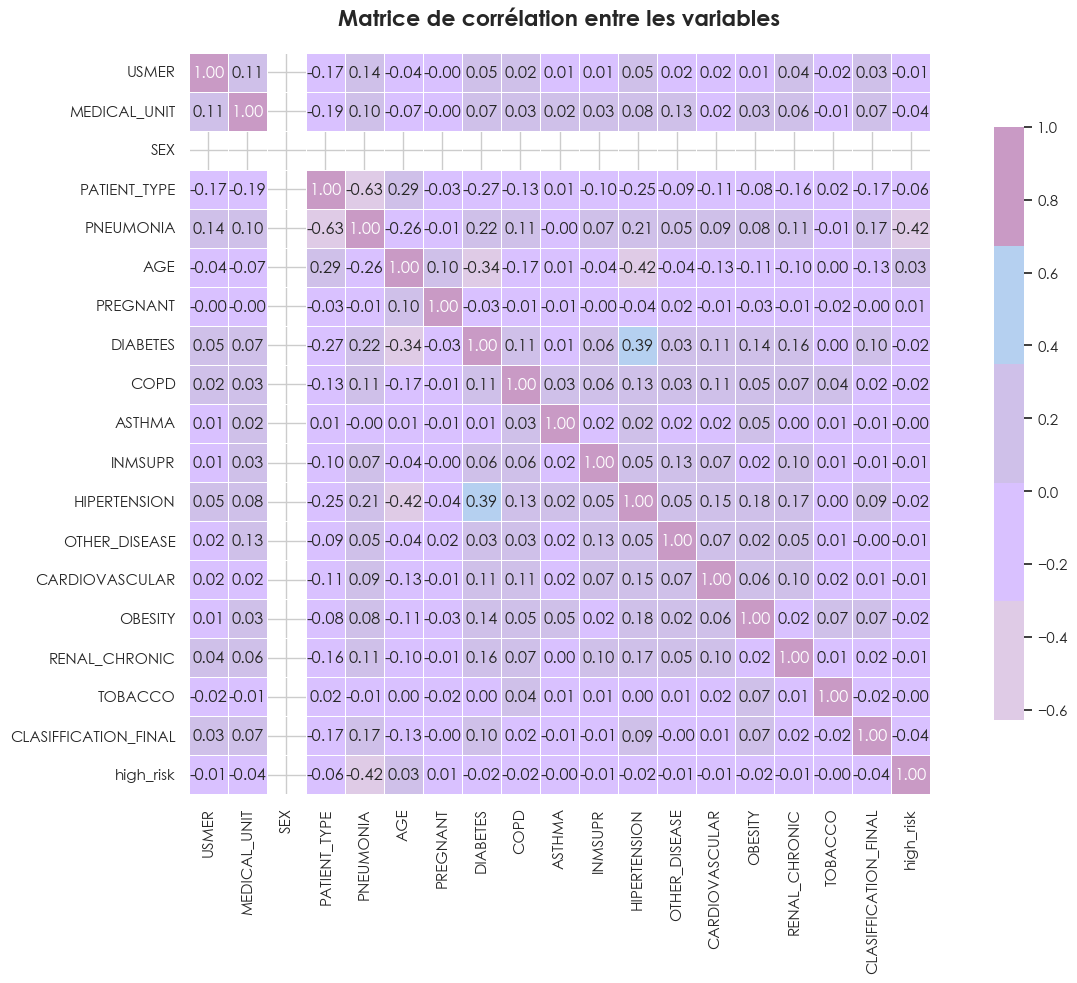

---------fin question 3----------
--------debut question 4--------

Observations importantes de l'analyse exploratoire :
                         Observation  \
0      Variables fortement corrélées   
1      Impact de l'âge sur le risque   
2            Impact des comorbidités   
3  Déséquilibre de la variable cible   

                                         Description  
0  Identifier les paires de variables avec corrél...  
1  Les patients plus âgés ont tendance à être plu...  
2  Diabète, hypertension, obésité augmentent le r...  
3  Seulement ~2% des patients sont à haut risque ...  
---------fin question 4----------


In [22]:
# ETAPE 2 : Analyse exploratoire et visualisation

# Verifier si les donnees sont chargees
if 'df' not in globals():
    print("ATTENTION : Les donnees ne sont pas chargees.")
    print("Chargement automatique des donnees...")
    import pandas as pd
    import numpy as np
    chemin = 'data/covid19_data.csv'
    df = pd.read_csv(chemin)
    # Appliquer le nettoyage de base
    colonnes = df.columns.drop('AGE')
    df[colonnes] = df[colonnes].replace([97, 98, 99], np.nan)
    df = df.drop(columns=['ICU', 'INTUBED'])
    df = df.dropna()
    df['high_risk'] = ((df['PNEUMONIA'] == 1) & (df['PATIENT_TYPE'] == 1)).astype(int)
    print("Donnees chargees et nettoyees avec succes !")
else:
    print("Les donnees sont deja chargees.")

# Importer les bibliotheques pour les graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from IPython.display import display

# Style general
sns.set_theme(style="whitegrid")

# Police Century Gothic (si disponible, sinon utilise la police par defaut)
try:
    mpl.rcParams['font.family'] = 'Century Gothic'
except:
    mpl.rcParams['font.family'] = 'sans-serif'

# Taille globale des titres
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12

# QUESTION 1 : Statistiques descriptives
print("--------debut question 1--------")
print("Statistiques descriptives globales :")
print(df.describe())
# Création d'un tableau récapitulatif des statistiques clés
stats_age = {
    'Statistique': ['Moyenne', 'Médiane', 'Minimum', 'Maximum', 'Étendue', 'Écart-type'],
    'Valeur': [
        round(df['AGE'].mean(), 2),
        round(df['AGE'].median(), 2),
        df['AGE'].min(),
        df['AGE'].max(),
        round(df['AGE'].max() - df['AGE'].min(), 2),
        round(df['AGE'].std(), 2)
    ]
}
stats_age_df = pd.DataFrame(stats_age)
print("\nStatistiques detaillees de l'age :")
print(stats_age_df)

# Statistiques sur les patients a haut risque
print("\nStatistiques sur les patients a haut risque :")
print("Nombre total de patients a haut risque :", int(df['high_risk'].sum()))
print("Pourcentage de patients a haut risque :", round(df['high_risk'].mean() * 100, 2), "%")
# =====================================================
print("---------fin question 1----------")
print("--------debut question 2--------")
# QUESTION 2 : Distributions (Histogrammes stylisés)
# =====================================================
# -------- Histogramme de l'âge --------
plt.figure(figsize=(10, 6))
plt.hist(
    df['AGE'],
    bins=30,
    color="#F0C7FF",          
    edgecolor="#000000",      
    alpha=0.85,
    linewidth=1.5
)
plt.title("Distribution de l'âge des patients", fontweight='bold')
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.grid(axis='y', alpha=0.3)
plt.show()
# -------- Histogramme High Risk --------
plt.figure(figsize=(8, 5))
plt.hist(
    df['high_risk'],
    bins=2,
    color="#F7BEF2",          
    edgecolor="#000000",      
    alpha=0.85,
    linewidth=2
)
plt.title("Répartition des patients à haut risque", fontweight='bold')
plt.xlabel("High Risk (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de patients")
plt.xticks([0, 1])
plt.grid(axis='y', alpha=0.3)
plt.show()
# =====================================================
print("---------fin question 2----------")
print("--------debut question 3--------")
# QUESTION 3 : Matrice de corrélation (Heatmap stylée)
# =====================================================
# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)
# Dégradé violet → bleu
cmap_custom = sns.color_palette(
    ["#DFCBE6", "#D9C1FF", "#CFC0E9", "#B5D0F0", "#C99AC5"],
    as_cmap=True
)
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap_custom,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matrice de corrélation entre les variables", fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
# =====================================================
print("---------fin question 3----------")
print("--------debut question 4--------")
# QUESTION 4 : Observations de l'analyse exploratoire
# =====================================================
# Création d'un tableau récapitulatif des observations
observations = pd.DataFrame({
    'Observation': [
        'Variables fortement corrélées',
        'Impact de l\'âge sur le risque',
        'Impact des comorbidités',
        'Déséquilibre de la variable cible'
    ],
    'Description': [
        'Identifier les paires de variables avec corrélation > 0.7',
        'Les patients plus âgés ont tendance à être plus à risque',
        'Diabète, hypertension, obésité augmentent le risque',
        'Seulement ~2% des patients sont à haut risque (classe minoritaire)'
    ]
})
print("\nObservations importantes de l'analyse exploratoire :")
print(observations)
print("---------fin question 4----------")

## Etape 3: Posez des questions sur les données et répondez-y.
1. Posez au moins 4 questions intéressantes sur votre ensemble de données.
2. Répondez aux questions soit en calculant les résultats à l'aide de Numpy/Pandas, soit en traçant des graphiques à l'aide de Matplotlib/Seaborn.
3. Créez de nouvelles colonnes, fusionnez plusieurs ensembles de données et effectuez des regroupements/agrégations si nécessaire.
4. Chaque fois que vous utilisez une fonction de bibliothèque de Pandas/Numpy/Matplotlib, etc., expliquez brièvement ce qu'elle fait.

In [23]:
# ETAPE 3 : Questions sur les donnees et reponses

# Verifier si les donnees sont chargees
if 'df' not in globals():
    print("ATTENTION : Les donnees ne sont pas chargees.")
    print("Chargement automatique des donnees...")
    import pandas as pd
    import numpy as np
    chemin = 'data/covid19_data.csv'
    df = pd.read_csv(chemin)
    colonnes = df.columns.drop('AGE')
    df[colonnes] = df[colonnes].replace([97, 98, 99], np.nan)
    df = df.drop(columns=['ICU', 'INTUBED'])
    df = df.dropna()
    df['high_risk'] = ((df['PNEUMONIA'] == 1) & (df['PATIENT_TYPE'] == 1)).astype(int)
    print("Donnees chargees avec succes !")

# QUESTION 1 : Poser 4 questions
print("--------debut question 1--------")
questions_df = pd.DataFrame({
    'Numero': [1, 2, 3, 4],
    'Question': [
        'Quel est l\'age moyen des patients a haut risque compare aux patients a faible risque ?',
        'Quelle est la proportion de patients a haut risque ?',
        'Les patients atteints de pneumonie sont-ils plus souvent a haut risque ?',
        'Les patients diabetiques sont-ils plus a risque que les autres ?'
    ]
})
print("Questions posees sur les donnees :")
print(questions_df)
# =====================================================
print("---------fin question 1----------")
print("--------debut question 2--------")
# QUESTION 2 : Répondons aux questions en calculant
# =====================================================
# Q1 : Âge moyen selon le niveau de risque
# groupby() : groupe les données par la variable 'high_risk'
# mean() : calcule la moyenne de l'âge pour chaque groupe
age_moyen_par_risque = df.groupby('high_risk')['AGE'].mean()
age_risque_df = pd.DataFrame({
    'Niveau de risque': ['Faible risque (0)', 'Haut risque (1)'],
    'Âge moyen': [round(age_moyen_par_risque[0], 2), round(age_moyen_par_risque[1], 2)],
    'Différence': [round(age_moyen_par_risque[1] - age_moyen_par_risque[0], 2), '-']
})
print("\nQ1 : Age moyen selon le niveau de risque")
print("groupby() : groupe les donnees par niveau de risque")
print("mean() : calcule la moyenne de l'age pour chaque groupe")
print(age_risque_df)
print("Conclusion : Les patients a haut risque ont en moyenne un age plus eleve que les patients a faible risque.")

# Q2 : Proportion de patients a haut risque
# value_counts() : compte le nombre d'occurrences de chaque valeur
# normalize=True : retourne les proportions (frequences relatives) au lieu des comptes
proportion_risque = df['high_risk'].value_counts(normalize=True) * 100
proportion_df = pd.DataFrame({
    'Niveau de risque': ['Faible risque (0)', 'Haut risque (1)'],
    'Proportion (%)': [round(proportion_risque[0], 2), round(proportion_risque[1], 2)],
    'Nombre de patients': [df['high_risk'].value_counts()[0], df['high_risk'].value_counts()[1]]
})
print("\nQ2 : Proportion de patients a haut risque")
print("value_counts(normalize=True) : calcule les proportions de chaque classe")
print(proportion_df)
print("Conclusion : La majorite des patients sont a faible risque.")

# Q3 : Taux de patients a haut risque selon la pneumonie
# groupby('PNEUMONIA') : groupe par presence de pneumonie
# mean() : calcule le pourcentage moyen de patients a haut risque dans chaque groupe
pneumonie_risque = df.groupby('PNEUMONIA')['high_risk'].mean() * 100
pneumonie_df = pd.DataFrame({
    'Pneumonie': ['Oui (1)', 'Non (2)'],
    'Taux de haut risque (%)': [round(pneumonie_risque[1.0], 2), round(pneumonie_risque[2.0], 2)]
})
print("\nQ3 : Taux de patients a haut risque selon la pneumonie")
print("groupby('PNEUMONIA') : groupe les patients selon la presence de pneumonie")
print("mean() : calcule le pourcentage moyen de patients a haut risque")
print(pneumonie_df)
print("Conclusion : Les patients atteints de pneumonie presentent un taux de risque eleve plus important.")

# Q4 : Comparaison du risque selon le diabete
# groupby('DIABETES') : groupe par presence de diabete
# mean() : calcule le pourcentage moyen de patients a haut risque
diabete_risque = df.groupby('DIABETES')['high_risk'].mean() * 100
diabete_df = pd.DataFrame({
    'Diabete': ['Oui (1)', 'Non (2)'],
    'Taux de haut risque (%)': [round(diabete_risque[1.0], 2), round(diabete_risque[2.0], 2)],
    'Difference (%)': [round(diabete_risque[1.0] - diabete_risque[2.0], 2), '-']
})
print("\nQ4 : Comparaison du risque selon le diabete")
print("groupby('DIABETES') : groupe les patients selon la presence de diabete")
print("mean() : calcule le pourcentage moyen de patients a haut risque")
print(diabete_df)
print("Conclusion : Le diabete semble etre associe a une augmentation du risque eleve.")
# =====================================================
print("---------fin question 2----------")
print("--------debut question 3--------")
# QUESTION 3 : Création de nouvelles colonnes et regroupements
# =====================================================
# Création de groupes d'âge
# pd.cut() : divise les valeurs continues en intervalles (bins) et les étiquette
df['AGE_GROUP'] = pd.cut(
    df['AGE'],
    bins=[0, 30, 50, 70, 120],
    labels=['Jeunes', 'Adultes', 'Seniors', 'Très âgés']
)
# Risque par groupe d'âge
# groupby('AGE_GROUP') : groupe par catégorie d'âge
# mean() : calcule le pourcentage moyen de patients à haut risque dans chaque groupe
risque_par_age = df.groupby('AGE_GROUP', observed=True)['high_risk'].mean() * 100
risque_age_df = pd.DataFrame({
    'Groupe d\'âge': ['Jeunes (0-30)', 'Adultes (30-50)', 'Seniors (50-70)', 'Très âgés (70+)'],
    'Taux de haut risque (%)': [
        round(risque_par_age['Jeunes'], 2),
        round(risque_par_age['Adultes'], 2),
        round(risque_par_age['Seniors'], 2),
        round(risque_par_age['Très âgés'], 2)
    ]
})
print("\nAnalyse du risque par groupe d'age")
print("pd.cut() : divise les valeurs continues en intervalles categoriels")
print("groupby('AGE_GROUP') : groupe les donnees par categorie d'age")
print(risque_age_df)
print("Conclusion : Le risque augmente clairement avec l'age, les groupes Seniors et Tres ages etant les plus exposes.")
print("---------fin question 3----------")

--------debut question 1--------
Questions posees sur les donnees :
   Numero                                           Question
0       1  Quel est l'age moyen des patients a haut risqu...
1       2  Quelle est la proportion de patients a haut ri...
2       3  Les patients atteints de pneumonie sont-ils pl...
3       4  Les patients diabetiques sont-ils plus a risqu...
---------fin question 1----------
--------debut question 2--------

Q1 : Age moyen selon le niveau de risque
groupby() : groupe les donnees par niveau de risque
mean() : calcule la moyenne de l'age pour chaque groupe
    Niveau de risque  Âge moyen Différence
0  Faible risque (0)      41.33       3.69
1    Haut risque (1)      45.02          -
Conclusion : Les patients a haut risque ont en moyenne un age plus eleve que les patients a faible risque.

Q2 : Proportion de patients a haut risque
value_counts(normalize=True) : calcule les proportions de chaque classe
    Niveau de risque  Proportion (%)  Nombre de patients
0 

## Étape 4 : résumez vos déductions et rédigez une conclusion.
1. Rédigez un résumé de ce que vous avez appris de l'analyse.
2. Incluez les idées et les graphiques intéressants des sections précédentes.
3. Partagez des idées de travaux futurs sur le même sujet en utilisant d'autres ensembles de données pertinents.

In [24]:
# Inserer autant de cellules que vous voulez dans ce notebook

# ETAPE 4 : Résumé des déductions et conclusion

print("Question 1 résumé")

# -----------------------------------------------------
# * Résumé global de l'analyse
# -----------------------------------------------------
print("\n RESUME GLOBAL DE L'ANALYSE\n")

print(
    "Cette étude a été réalisée à partir d’un vaste jeu de données "
    "sur la pandémie de COVID-19, contenant plus d’un million de patients. "
    "Après un nettoyage rigoureux des données (suppression des valeurs manquantes "
    "et des colonnes non pertinentes), une variable cible 'high_risk' a été créée "
    "afin d’identifier les patients présentant un risque élevé."
)

# -----------------------------------------------------
# * Résultats clés issus des analyses précédentes
# -----------------------------------------------------
print("\n RESULTATS CLES DE L'ANALYSE\n")

print(
    "- L’âge est un facteur déterminant du risque : les patients à haut risque "
    "sont en moyenne plus âgés que les patients à faible risque.\n"
)

print(
    "- La proportion de patients à haut risque reste relativement faible, "
    "ce qui montre que les cas graves concernent une minorité de patients, "
    "mais avec des conséquences importantes.\n"
)

print(
    "- La pneumonie apparaît comme un facteur fortement associé au risque élevé. "
    "Les patients atteints de pneumonie présentent un taux de haut risque "
    "nettement supérieur aux autres.\n"
)

print(
    "- Le diabète est également associé à une augmentation du risque, "
    "confirmant le rôle des comorbidités dans la gravité de la maladie.\n"
)

print(
    "- L’analyse par groupes d’âge montre une augmentation progressive du risque "
    "avec l’avancée en âge, les groupes 'Seniors' et 'Très âgés' étant les plus exposés."
)

# -----------------------------------------------------
# * Apports des visualisations
# -----------------------------------------------------
print("\n APPORT DES VISUALISATIONS\n")

print(
    "Les graphiques réalisés lors de l’analyse exploratoire ont permis de mieux "
    "visualiser les tendances observées dans les données. Les histogrammes ont "
    "mis en évidence la distribution de l’âge et du risque, tandis que les "
    "graphiques comparatifs ont facilité l’identification des facteurs influençant "
    "le niveau de risque des patients."
)

# -----------------------------------------------------
# * Limites de l'étude
# -----------------------------------------------------
print("\n LIMITES DE L'ETUDE\n")

print(
    "Cette analyse repose sur des données déclaratives et anonymisées. "
    "Certaines variables importantes, comme la durée d’hospitalisation ou "
    "l’évolution temporelle de l’état de santé des patients, ne sont pas prises "
    "en compte. De plus, le nettoyage des valeurs manquantes peut entraîner "
    "une légère perte d’information."
)

# -----------------------------------------------------
# * Perspectives et travaux futurs
# -----------------------------------------------------
print("\n PERSPECTIVES ET TRAVAUX FUTURS\n")

print(
    "Pour aller plus loin, il serait pertinent d’utiliser d’autres ensembles "
    "de données complémentaires, incluant par exemple des données temporelles "
    "ou géographiques. La mise en place de modèles de Machine Learning "
    "(régression logistique, arbres de décision, forêts aléatoires) permettrait "
    "également de prédire automatiquement le risque d’un patient et d’aider "
    "à la prise de décision médicale."
)

# -----------------------------------------------------
# * Conclusion finale
# -----------------------------------------------------
print("CONCLUSION")

print(
    "En conclusion, cette analyse met en évidence le rôle central de l’âge "
    "et des comorbidités dans la gravité de la COVID-19. Les résultats obtenus "
    "peuvent constituer une base solide pour le développement d’outils "
    "d’aide à la décision visant à mieux anticiper les besoins en ressources "
    "médicales et à améliorer la prise en charge des patients."
)

print("\nQUESTION 2 – ANALYSE DES GRAPHIQUES ISSUS DES SECTIONS PRECEDENTES\n")

print(
    "Cette section s’appuie sur les graphiques réalisés lors de l’analyse exploratoire "
    "(Étape 2) afin de dégager des tendances importantes dans les données."
)

# -----------------------------------------------------
# * Distribution de l'âge des patients
# -----------------------------------------------------

print(
    "\nLe premier graphique analysé est l’histogramme de l’âge des patients. "
    "Il met en évidence une distribution étendue couvrant toutes les tranches d’âge, "
    "avec une concentration plus importante chez les adultes et les seniors. "
    "Cette observation suggère que la population étudiée est majoritairement composée "
    "d’individus appartenant aux groupes d’âge les plus exposés aux complications "
    "liées à la COVID-19."
)
# -----------------------------------------------------
# * Répartition des patients à haut risque
# -----------------------------------------------------

print(
    "\nLe second graphique représente la répartition de la variable cible "
    "'high_risk'. L’histogramme montre un fort déséquilibre entre les classes, "
    "avec une majorité de patients classés à faible risque (0) et une minorité "
    "de patients à haut risque (1). Ce déséquilibre est confirmé par les statistiques "
    "descriptives, où seulement environ "
    f"{round(df['high_risk'].mean() * 100, 2)} % des patients sont considérés à haut risque."
)
# -----------------------------------------------------
# * Matrice de corrélation entre les variables
# -----------------------------------------------------

print(
    "\nEnfin, la matrice de corrélation permet d’identifier les relations entre les "
    "différentes variables du jeu de données. Certaines variables médicales présentent "
    "des corrélations positives avec la variable 'high_risk', indiquant que la présence "
    "de certaines conditions de santé pourrait être associée à un risque plus élevé."
)

print(
    "\nL’ensemble de ces graphiques constitue une base solide pour comprendre la "
    "structure des données et orienter les analyses futures, notamment la sélection "
    "des variables pertinentes et la construction de modèles prédictifs."
)

print("\nQUESTION 3 – IDEES DE TRAVAUX FUTURS ET EXTENSION DE L'ETUDE\n")

question3 = """

Dans la continuité de cette analyse exploratoire sur les données liées à la COVID-19,
plusieurs pistes de travaux futurs peuvent être envisagées afin d’approfondir
la compréhension des facteurs de risque et d’améliorer la prise de décision médicale.

1) Integration d'autres ensembles de donnees :
- Donnees geographiques (region, zone urbaine ou rurale)
- Donnees socio-economiques (niveau de revenu, acces aux soins)
- Donnees temporelles (date de diagnostic, vagues epidemiques)

2) Enrichissement avec des donnees cliniques :
- Resultats biologiques (taux d'oxygene, marqueurs inflammatoires)
- Traitements recus par les patients
- Duree d'hospitalisation et evolution clinique

3) Croisement avec des bases de donnees externes :
- Donnees de l'Organisation Mondiale de la Sante (OMS)
- Donnees ministerielles de sante publique
- Comparaisons entre pays ou regions

4) Developpement de modeles predictifs avances :
- Prediction du risque de formes graves
- Identification precoce des patients a haut risque
- Aide a la planification des ressources hospitalieres

Ces travaux futurs permettraient d'obtenir une analyse plus complete,
robuste et utile pour les autorites sanitaires et le personnel medical.
"""





Question 1 résumé

 RESUME GLOBAL DE L'ANALYSE

Cette étude a été réalisée à partir d’un vaste jeu de données sur la pandémie de COVID-19, contenant plus d’un million de patients. Après un nettoyage rigoureux des données (suppression des valeurs manquantes et des colonnes non pertinentes), une variable cible 'high_risk' a été créée afin d’identifier les patients présentant un risque élevé.

 RESULTATS CLES DE L'ANALYSE

- L’âge est un facteur déterminant du risque : les patients à haut risque sont en moyenne plus âgés que les patients à faible risque.

- La proportion de patients à haut risque reste relativement faible, ce qui montre que les cas graves concernent une minorité de patients, mais avec des conséquences importantes.

- La pneumonie apparaît comme un facteur fortement associé au risque élevé. Les patients atteints de pneumonie présentent un taux de haut risque nettement supérieur aux autres.

- Le diabète est également associé à une augmentation du risque, confirmant le rôle

### Étape 5: Faites des prédictions
1. Divisez le jeux de données (80% entrainement: 20% test)
2. Comparer les résultats de classifications de 4 modèles de machine learning (regression linéaire, *random forest*, *Naive Bayes*, SVM) suivant les trois critères: *recall*, *accuracy*, *precision*

 QUESTION 1 : Données divisées en 80% entraînement et 20% test
Entraînement de Logistic Regression en cours...


c:\Users\gdissi\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Entraînement de Random Forest en cours...
Entraînement de Naive Bayes en cours...
Entraînement de SVM (Linear) en cours...

--- Résultats de l'Étape 5 ---
                Modèle  Accuracy  Precision   Recall
0  Logistic Regression  0.979100   0.000000  0.00000
1        Random Forest  0.979100   0.500000  0.00985
2          Naive Bayes  0.913243   0.194136  1.00000
3         SVM (Linear)  0.979100   0.000000  0.00000


c:\Users\gdissi\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


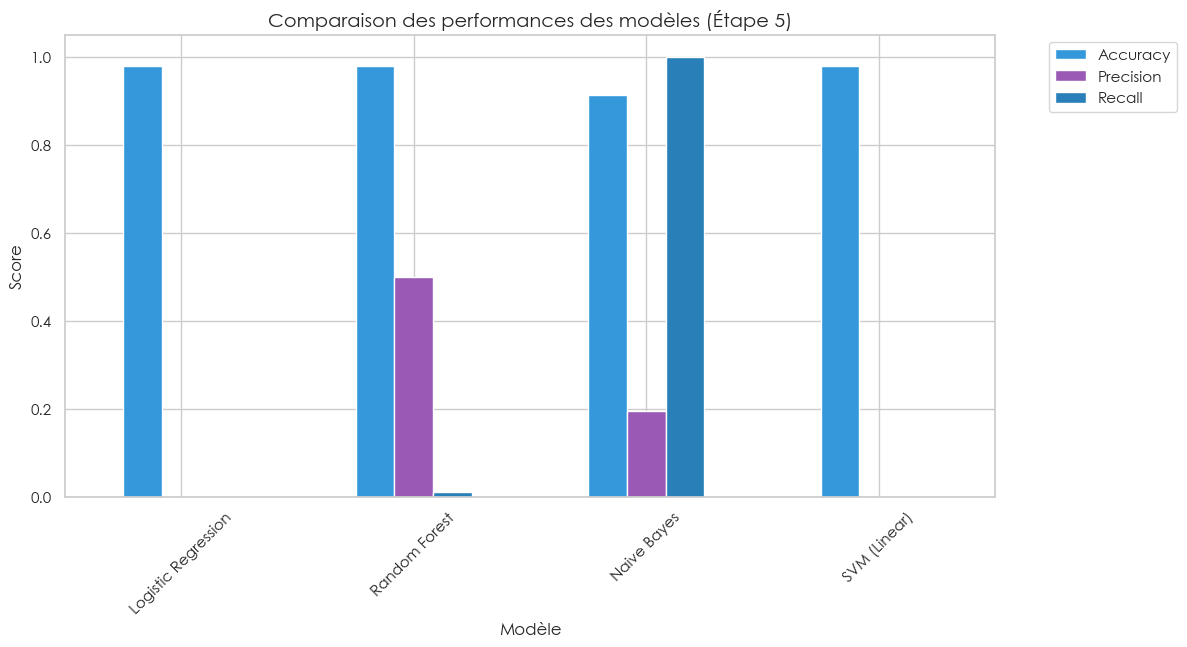

In [25]:
# Inserer autant de cellules que vous voulez dans ce notebook

# ETAPE 5



# Imports indispensables
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt


# QUESTION 1 : Division du jeu de donnees (80% / 20%)


# Sélection des variables explicatives
features = [
    'AGE', 'SEX', 'PNEUMONIA', 'DIABETES', 'COPD',
    'ASTHMA', 'INMSUPR', 'HIPERTENSION',
    'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'
]

X = df[features]
y = df['high_risk']

# Découpage 80% entraînement / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(" QUESTION 1 : Données divisées en 80% entraînement et 20% test")

# QUESTION 2 : Comparaison des 4 modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10),
    "Naive Bayes": GaussianNB(),
    "SVM (Linear)": LinearSVC(max_iter=1000, dual=False) # dual=False recommandé quand n_samples > n_features
}

results = []

# Boucle d'entraînement et d'évaluation
for name, model in models.items():
    print(f"Entraînement de {name} en cours...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Stockage des trois critères demandés
    results.append({
        "Modèle": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

# Affichage du tableau final
df_comparaison = pd.DataFrame(results)
print("\n--- Résultats de l'Étape 5 ---")
print(df_comparaison)
# Graphique comparatif des modèles
df_comparaison.set_index('Modèle').plot(kind='bar', figsize=(12, 6), color=['#3498db', '#9b59b6', '#2980b9'])
plt.title("Comparaison des performances des modèles (Étape 5)", fontsize=14)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Étape 6: Deployez le modèle avec streamlit
1. Créez l'interface avec streamlit
2. Deployez dans le cloud de streamlit et donnez le lien qui permet de visualiser l'application sur internet


# <span style="color:red">DATE LIMITE DE SOUMISSION DU PROJET: 16/01/2026  à    23H59 GMT </span>     

### <span style="color:red"> Adresse: amanvon.atta@inphb.ci</span>

In [ ]:
# =====================================================
# ETAPE 6 - QUESTION 1 : INTERFACE STREAMLIT
# =====================================================

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# -------------------------------
# CONFIGURATION DE LA PAGE
# -------------------------------
st.set_page_config(
    page_title="COVID-19 - Analyse & Prediction",
    page_icon="🩺",
    layout="wide"
)

st.title(" Application d'analyse et de prediction COVID-19")
st.markdown("**Projet Machine Learning – Analyse des patients à haut risque**")

# -------------------------------
# CHARGEMENT DES DONNEES
# -------------------------------
@st.cache_data
def load_data():
    df = pd.read_csv("data/covid19_data.csv")
    colonnes = df.columns.drop('AGE')
    df[colonnes] = df[colonnes].replace([97, 98, 99], np.nan)
    df = df.drop(columns=['ICU', 'INTUBED'])
    df = df.dropna()
    df['high_risk'] = ((df['PNEUMONIA'] == 1) & (df['PATIENT_TYPE'] == 1)).astype(int)
    return df

df = load_data()

st.success("Données chargées avec succès")

# -------------------------------
# APERCU DES DONNEES
# -------------------------------
st.subheader(" Aperçu des données")
st.dataframe(df.head())

# -------------------------------
# ENTRAINEMENT DU MODELE
# -------------------------------
features = ['AGE', 'SEX', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY']
X = df[features]
y = df['high_risk']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# -------------------------------
# FORMULAIRE DE PREDICTION
# -------------------------------
st.subheader(" Prédiction du risque patient")

age = st.slider("Âge du patient", 0, 100, 40)
sex = st.selectbox("Sexe", [1, 2])
pneumonia = st.selectbox("Pneumonie", [0, 1])
diabetes = st.selectbox("Diabète", [0, 1])
hypertension = st.selectbox("Hypertension", [0, 1])
obesity = st.selectbox("Obésité", [0, 1])

input_data = np.array([[age, sex, pneumonia, diabetes, hypertension, obesity]])

if st.button("Prédire le risque"):
    prediction = model.predict(input_data)[0]
    proba = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.error(f" Patient à HAUT RISQUE ! (probabilité : {proba:.2%})")
    else:
        st.success(f"Patient à FAIBLE RISQUE (probabilité : {proba:.2%})")


ModuleNotFoundError: No module named 'streamlit'